In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error ,r2_score,mean_absolute_error,mean_absolute_percentage_error
import xgboost as xgb

In [2]:
os.chdir('C:\\Users\\tsekourash\\Desktop\\eydap')

In [3]:
df = pd.read_csv("concat_data.csv")
print(df.shape)
df.head(5)

(62917, 8)


,Date,Value,isCovid,isHoliday,isChristmas,isWeekday,isSummer,index
0,2020-03-13 00:00:00,1.22,1,0,0,1,0,1
1,2020-03-14 00:00:00,1.33,1,0,0,0,0,1
2,2020-03-15 00:00:00,0.20,1,0,0,0,0,1
3,2020-03-16 00:00:00,0.07,1,0,0,1,0,1
4,2020-03-17 00:00:00,1.07,1,0,0,1,0,1


In [4]:
df["Date"]=pd.to_datetime(df["Date"])
print(df.shape)
df.head(5)

(62917, 8)


,Date,Value,isCovid,isHoliday,isChristmas,isWeekday,isSummer,index
0,2020-03-13,1.22,1,0,0,1,0,1
1,2020-03-14,1.33,1,0,0,0,0,1
2,2020-03-15,0.20,1,0,0,0,0,1
3,2020-03-16,0.07,1,0,0,1,0,1
4,2020-03-17,1.07,1,0,0,1,0,1


In [5]:
df=df[["Date","Value","index"]]
print(df.shape)
df.head(5)

(62917, 3)


,Date,Value,index
0,2020-03-13,1.22,1
1,2020-03-14,1.33,1
2,2020-03-15,0.20,1
3,2020-03-16,0.07,1
4,2020-03-17,1.07,1


In [6]:
df.isna().sum()

Date     0
Value    0
index    0
dtype: int64

In [7]:
df = df.sort_index()
print(df.shape)
df.head(5)

(62917, 3)


,Date,Value,index
0,2020-03-13,1.22,1
1,2020-03-14,1.33,1
2,2020-03-15,0.20,1
3,2020-03-16,0.07,1
4,2020-03-17,1.07,1


In [8]:
df=df[['Date','Value']].groupby('Date').mean()
print(df.shape)
df.head(5)

(1676, 1)


,Value
Date,
2019-01-04,13.620000
2019-01-05,13.730000
2019-01-06,8.690000
2019-01-07,8.540000
2019-01-08,8.713333


In [10]:
test=df[df.index>'2021-11-09']
print(test.shape)
test.head(5)

(503, 1)


,Value
Date,
2021-11-10,15.098302
2021-11-11,16.646038
2021-11-12,14.988868
2021-11-13,14.768679
2021-11-14,11.516604


In [11]:
train=df[df.index<='2021-11-09']
print(train.shape)
train.head(5)

(1173, 1)


,Value
Date,
2019-01-04,13.620000
2019-01-05,13.730000
2019-01-06,8.690000
2019-01-07,8.540000
2019-01-08,8.713333


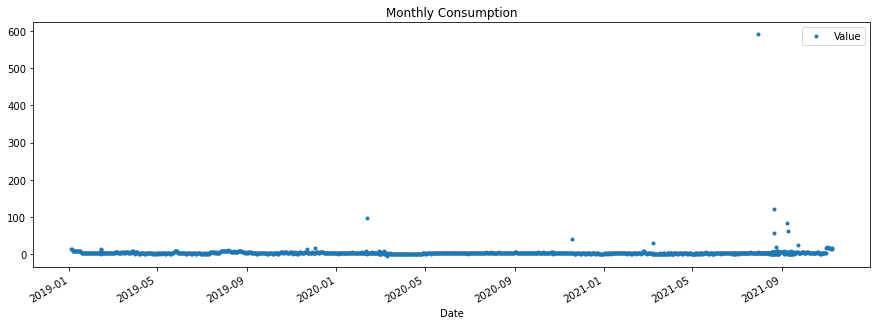

In [12]:
train.plot(style='.',
        figsize=(15, 5),
        title='Monthly Consumption')
plt.show()

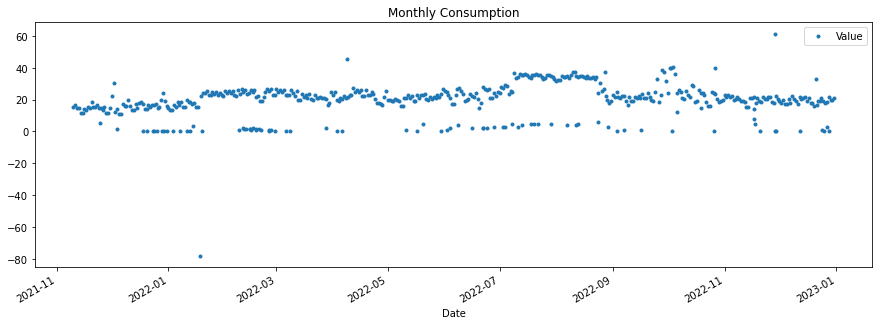

In [13]:
test.plot(style='.',
        figsize=(15, 5),
        title='Monthly Consumption')
plt.show()

In [14]:
def create_features(df):
    df["rolling_month"] = df['Value'].rolling(window=30).mean()
    df["rolling_3month"] = df['Value'].rolling(window=3*30).mean()
    df["rolling_week"] = df['Value'].rolling(window=7).mean()
    df["shift1"] =df['Value'].shift(1)
    #df["shift7"] =df['Value'].shift(7)
    #df['quarter'] = df.index.quarter
    #df['month'] = df.index.month
    #df['year'] = df.index.year
    #df['dayofweek'] = df.index.dayofweek
    df=df.dropna()
    return df

In [15]:
train=create_features(train)
print(train.shape)
train.head(5)

(1084, 5)


,Value,rolling_month,rolling_3month,rolling_week,shift1
Date,,,,,
2019-03-29 00:00:00,7.961250,4.782292,5.273876,5.396786,7.932500
2019-03-30 00:00:00,6.051250,4.826292,5.189779,5.632500,7.961250
2019-03-31 00:00:00,4.060000,4.797417,5.082335,5.729464,6.051250
2019-04-01 00:00:00,4.178571,4.771077,5.032208,5.823724,4.060000
2019-04-01 00:15:00,0.110000,4.658827,4.938541,5.356760,4.178571


In [16]:
test=create_features(test)
print(test.shape)
test.head(5)

(414, 5)


,Value,rolling_month,rolling_3month,rolling_week,shift1
Date,,,,,
2022-01-22,25.222000,10.592519,12.550527,4.728083,23.914909
2022-01-23,22.735091,11.350355,12.635380,5.748508,25.222000
2022-01-24,22.844182,11.579730,12.704248,20.175296,22.735091
2022-01-25,24.594000,11.910563,12.810972,20.483143,22.844182
2022-01-26,23.279273,12.241787,12.905534,23.808753,24.594000


In [17]:
X_train=train.drop('Value',axis=1)
y_train=train["Value"]

In [18]:
X_test=test.drop('Value',axis=1)
y_test=test["Value"]

In [19]:
%%time
score = []

for g in [0, 3, 6]:
    for m in [ 5,6,7]:
        for l in [0.03, 0.01, 0.001]:
            for cw in [1,2,4]:
                 for s in [0.5 ,0.7,0.9]:
                    for l1 in [ 0.01, 10, 100]:
                
                        rfr = xgb.XGBRegressor(booster= "gbtree" ,
                                                   objective="reg:squarederror",
                                                   eval_metric="rmse",
                                                   n_estimators=100,
                                                   early_stopping_rounds=10,
                                                   random_state=123,
                                                   gamma=g,
                                                   max_depth=m,
                                                   learning_rate=l,
                                                   min_child_weight=cw,
                                                   subsample = s,
                                                   reg_alpha = l1
                            )
                        rfr.fit(X_train, y_train,
                                    eval_set=[(X_train, y_train)],
                                    verbose=False
                                   )
                        score.append([    g, 
                                          m,
                                          l,
                                          cw,
                                          s,
                                          l1,
                                          mean_squared_error(y_train, rfr.predict(X_train),squared=False)]
                                        )
  

CPU times: total: 20min 1s
Wall time: 1min 49s


In [20]:
rmse_df=pd.DataFrame(score,columns=["gamma","maxdepth","eta","child_weight","subsample","alpha","rmse"])
print(rmse_df.shape)
rmse_df.head(5)

(729, 7)


,gamma,maxdepth,eta,child_weight,subsample,alpha,rmse
0,0,5,0.03,1,0.5,0.01,9.238563
1,0,5,0.03,1,0.5,10.00,9.476789
2,0,5,0.03,1,0.5,100.00,11.361173
3,0,5,0.03,1,0.7,0.01,6.779180
4,0,5,0.03,1,0.7,10.00,7.142222


In [21]:
rmse_df.sort_values(by=['rmse']).head(1)

,gamma,maxdepth,eta,child_weight,subsample,alpha,rmse
168,0,7,0.03,1,0.9,0.01,5.0968


In [22]:
reg =  xgb.XGBRegressor(booster= "gbtree" ,
                                                   objective="reg:squarederror",
                                                   eval_metric="rmse",
                                                   n_estimators=500,
                
                                                   random_state=123,
                                                   gamma=0,
                                                   max_depth=7,
                                                   learning_rate=0.03,
                                                   min_child_weight=1,
                                                   subsample = 0.9,
                                                   reg_alpha = 0.01)
reg.fit(X_train, y_train,verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0.01, reg_lambda=1, ...)

In [35]:
import pickle
pickle.dump(reg, open("average_model.dat", "wb"))
 


In [23]:
X_test['prediction'] = reg.predict(X_test)
print(X_test.shape)
X_test.head(5)

(414, 5)


,rolling_month,rolling_3month,rolling_week,shift1,prediction
Date,,,,,
2022-01-22,10.592519,12.550527,4.728083,23.914909,3.209498
2022-01-23,11.350355,12.635380,5.748508,25.222000,4.999846
2022-01-24,11.579730,12.704248,20.175296,22.735091,38.898750
2022-01-25,11.910563,12.810972,20.483143,22.844182,10.885568
2022-01-26,12.241787,12.905534,23.808753,24.594000,11.297453


In [24]:
test_results = pd.DataFrame(data={'Test Predictions':X_test['prediction'] , 'Actuals':y_test})
test_results

,Test Predictions,Actuals
Date,,
2022-01-22 00:00:00,3.209498,25.222000
2022-01-23 00:00:00,4.999846,22.735091
2022-01-24 00:00:00,38.898750,22.844182
2022-01-25 00:00:00,10.885568,24.594000
2022-01-26 00:00:00,11.297453,23.279273
...,...,...
2022-12-28 00:00:00,13.210714,21.552250
2022-12-28 01:00:00,8.675838,0.000000
2022-12-29 00:00:00,9.299638,19.463902


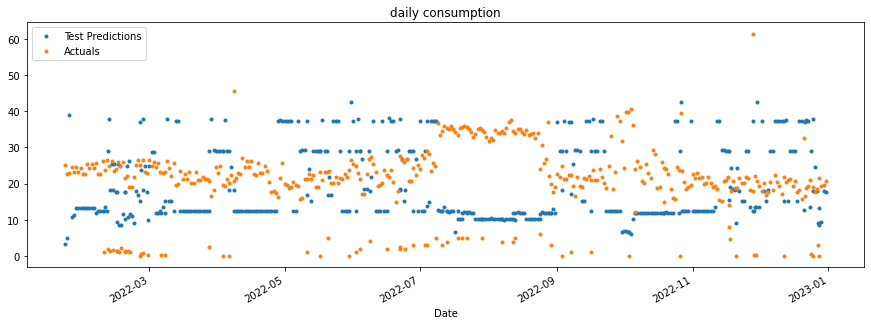

In [25]:
test_results.plot(style='.',
        figsize=(15, 5),
        title='daily consumption')
plt.show()

In [26]:
rmse_test=mean_squared_error(y_test, X_test['prediction'],squared=False)
rmse_test

15.122824084995333

In [27]:
mean_absolute_error(y_test, X_test['prediction'])

13.139031858432114

In [28]:
max_value = y_test.max()
accuracy = (max_value - rmse_test)/max_value
print(accuracy)

0.7539003403580897


In [29]:
X_train['prediction'] = reg.predict(X_train)
print(X_train.shape)
X_train.head(5)

(1084, 5)


,rolling_month,rolling_3month,rolling_week,shift1,prediction
Date,,,,,
2019-03-29 00:00:00,4.782292,5.273876,5.396786,7.932500,7.057958
2019-03-30 00:00:00,4.826292,5.189779,5.632500,7.961250,6.208840
2019-03-31 00:00:00,4.797417,5.082335,5.729464,6.051250,4.813782
2019-04-01 00:00:00,4.771077,5.032208,5.823724,4.060000,4.030081
2019-04-01 00:15:00,4.658827,4.938541,5.356760,4.178571,1.306835


In [30]:
rmse_train=mean_squared_error(y_train, X_train['prediction'],squared=False)
rmse_train

0.45616673244377365

In [31]:
max_value = y_train.max()
accuracy = (max_value - rmse_train)/max_value
print(accuracy)

0.9992310457454212


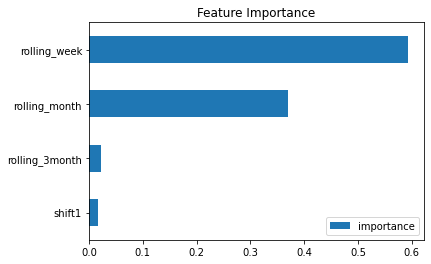

In [38]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()